# Import libraries

In [1]:
# importing required libraries

from keras.models import Sequential
from scipy.misc import imread
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import Dense
import pandas as pd

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras.applications.vgg16 import decode_predictions

from scipy.misc import imresize

Using TensorFlow backend.


In [2]:
import os

# Load data, set paths

In [3]:
cd E:\jersey

E:\jersey


In [4]:
wd=os.getcwd()

# Data Augmentation-already done, do not run

In [7]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.applications.imagenet_utils import preprocess_input as zero_mean

In [8]:
datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [9]:
classes=os.listdir(wd)
for _ in range(len(classes)):
    folder=wd+"\\"+classes[_]

    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            x = img_to_array(img) 
            x = x.reshape((1,) + x.shape)
        i = 0
        for batch in datagen.flow(x, batch_size=10,save_to_dir=classes[_], save_format='jpg'):
            i += 1
            if i > 20:
                break  # otherwise the generator would loop indefinitely

NameError: name 'cv2' is not defined

# Load data

In [5]:
qq=os.listdir(wd)[:-1]
data=[]
for i in qq:
    pp=os.path.join(wd,i)
    dd=os.listdir(pp)
    for j in dd:
        data.append(os.path.join(pp,j))

In [6]:
df=pd.DataFrame()
df['Images']=data

In [7]:
new = df["Images"].str.split("\\", n = 4, expand = True)

In [8]:
df["Label"]= new[2] 

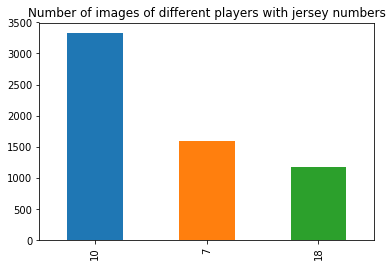

In [151]:
plt.title("Number of images of different players with jersey numbers")
df['Label'].value_counts().plot.bar()

In [9]:
df.head(),df.tail()

(                 Images Label
 0  E:\jersey\10\001.jpg    10
 1  E:\jersey\10\002.jpg    10
 2  E:\jersey\10\003.jpg    10
 3  E:\jersey\10\004.jpg    10
 4  E:\jersey\10\005.jpg    10,                        Images Label
 6089  E:\jersey\7\_0_9958.jpg     7
 6090  E:\jersey\7\_0_9969.jpg     7
 6091  E:\jersey\7\_0_9972.jpg     7
 6092  E:\jersey\7\_0_9976.jpg     7
 6093  E:\jersey\7\_0_9993.jpg     7)

In [10]:
# shuffle data
df = df.sample(frac=1).reset_index(drop=True)

# Train test split

In [11]:
#train=pd.read_csv("R/Data/Train/train.csv")
#test=pd.read_csv("R/Data/test.csv")
#train_path="R/Data/Train/Images/train/"
#test_path="R/Data/Train/Images/test/"

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2,stratify=df['Label'])

In [12]:
# preparing the train dataset

train_img=[]
for i in train['Images']:

    temp_img=image.load_img(i,target_size=(224,224))

    temp_img=image.img_to_array(temp_img)

    train_img.append(temp_img)

In [13]:
#converting train images to array and applying mean subtraction processing

train_img=np.array(train_img) 
train_img=preprocess_input(train_img)


In [14]:
# applying the same procedure with the test dataset

test_img=[]
for i in test['Images']:

    temp_img=image.load_img(i,target_size=(224,224))

    temp_img=image.img_to_array(temp_img)

    test_img.append(temp_img)
    
test_img=np.array(test_img) 
test_img=preprocess_input(test_img)



In [ ]:
#import pickle
#with open('train.pkl','wb') as f:
#    pickle.dump(train_img,f)

# Transfer learning

In [17]:
# loading VGG16 model weights
model = VGG16(weights='imagenet', include_top=False)

In [19]:

# Extracting features from the train dataset using the VGG16 pre-trained model

features_train=model.predict(train_img)
# Extracting features from the train dataset using the VGG16 pre-trained model

features_test=model.predict(test_img)



ValueError: cannot reshape array of size 122304000 into shape (49000,25088)

In [27]:

# flattening the layers to conform to MLP input

train_x=features_train.reshape(4875,-1)

In [40]:

test_x=features_test.reshape(1219,-1)

In [28]:
train_x.shape

(4875, 25088)

In [29]:
features_train.shape

(4875, 7, 7, 512)

In [30]:
train_y.shape

(4875, 3)

In [31]:
# converting target variable to array

train_y=np.asarray(train['Label'])
# performing one-hot encoding for the target variable

train_y=pd.get_dummies(train_y)
train_y=np.array(train_y)
# creating training and validation set

from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid=train_test_split(train_x,train_y,test_size=0.3, random_state=42)


In [41]:
test_y=np.asarray(test['Label'])

test_y=pd.get_dummies(test_y)
test_y=np.array(test_y)

In [34]:
# creating a mlp model
from keras.layers import Dense, Activation
model=Sequential()

model.add(Dense(1000, input_dim=25088, activation='relu',kernel_initializer='uniform'))
keras.layers.core.Dropout(0.3, noise_shape=None, seed=None)

model.add(Dense(500,input_dim=1000,activation='sigmoid'))
keras.layers.core.Dropout(0.4, noise_shape=None, seed=None)

model.add(Dense(150,input_dim=500,activation='sigmoid'))
keras.layers.core.Dropout(0.2, noise_shape=None, seed=None)

model.add(Dense(units=3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])



In [35]:
# fitting the model 

model.fit(X_train, Y_train, epochs=20, batch_size=128,validation_data=(X_valid,Y_valid))

Instructions for updating:
Use tf.cast instead.
Train on 3412 samples, validate on 1463 samples
Epoch 1/20
3412/3412 [==============================] - 12s 3ms/step - loss: 0.7832 - acc: 0.6700 - val_loss: 0.5072 - val_acc: 0.7656
Epoch 2/20
3412/3412 [==============================] - 11s 3ms/step - loss: 0.3336 - acc: 0.8775 - val_loss: 0.2475 - val_acc: 0.9159
Epoch 3/20
3412/3412 [==============================] - 11s 3ms/step - loss: 0.1067 - acc: 0.9792 - val_loss: 0.1168 - val_acc: 0.9617
Epoch 4/20
3412/3412 [==============================] - 11s 3ms/step - loss: 0.0268 - acc: 0.9977 - val_loss: 0.0641 - val_acc: 0.9788
Epoch 5/20
3412/3412 [==============================] - 11s 3ms/step - loss: 0.0087 - acc: 0.9994 - val_loss: 0.0580 - val_acc: 0.9850
Epoch 6/20
3412/3412 [==============================] - 11s 3ms/step - loss: 0.0043 - acc: 0.9997 - val_loss: 0.0514 - val_acc: 0.9843
Epoch 7/20
3412/3412 [==============================] - 11s 3ms/step - loss: 0.0026 - acc: 1.0

In [36]:
model.predict(X_valid)

array([[9.9965489e-01, 2.5659343e-04, 8.8591114e-05],
       [6.3626780e-05, 3.9258599e-04, 9.9954373e-01],
       [9.8454618e-01, 3.2307541e-03, 1.2223078e-02],
       ...,
       [9.4318275e-05, 2.3803963e-04, 9.9966764e-01],
       [9.9837315e-01, 1.4403367e-03, 1.8649698e-04],
       [4.8640769e-04, 9.9929202e-01, 2.2151323e-04]], dtype=float32)

In [38]:
model.evaluate(X_valid,Y_valid)

1463/1463 [==============================] - 1s 551us/step


[0.05194864389533559, 0.9849624060150376]

In [43]:
scores=model.evaluate(test_x,test_y)

1219/1219 [==============================] - 1s 578us/step


In [45]:
print(f"Accuracy is {scores[1]*100} %")

Accuracy is 98.35931091547208 %


In [89]:
output=np.argmax(model.predict(test_x),axis=1)

In [66]:
train.Label.value_counts()

10    2662
7     1278
18     935
Name: Label, dtype: int64

In [141]:
def print_names(output):
    output=['Messi' if x==0 else x for x in output]
    output=['Ronaldo' if x==2 else x for x in output]
    output=['Kohli' if x==1 else x for x in output] 
    return output

In [142]:
print_names(output)

['Messi',
 'Ronaldo',
 'Ronaldo',
 'Kohli',
 'Messi',
 'Kohli',
 'Kohli',
 'Messi',
 'Ronaldo',
 'Kohli',
 'Messi',
 'Messi',
 'Messi',
 'Kohli',
 'Messi',
 'Messi',
 'Kohli',
 'Messi',
 'Ronaldo',
 'Ronaldo',
 'Messi',
 'Kohli',
 'Messi',
 'Kohli',
 'Messi',
 'Kohli',
 'Kohli',
 'Ronaldo',
 'Ronaldo',
 'Messi',
 'Kohli',
 'Kohli',
 'Messi',
 'Messi',
 'Ronaldo',
 'Kohli',
 'Messi',
 'Ronaldo',
 'Kohli',
 'Messi',
 'Messi',
 'Messi',
 'Ronaldo',
 'Ronaldo',
 'Ronaldo',
 'Messi',
 'Kohli',
 'Messi',
 'Kohli',
 'Messi',
 'Ronaldo',
 'Messi',
 'Ronaldo',
 'Messi',
 'Ronaldo',
 'Messi',
 'Messi',
 'Messi',
 'Messi',
 'Kohli',
 'Ronaldo',
 'Messi',
 'Kohli',
 'Ronaldo',
 'Messi',
 'Kohli',
 'Messi',
 'Ronaldo',
 'Messi',
 'Messi',
 'Kohli',
 'Ronaldo',
 'Ronaldo',
 'Ronaldo',
 'Messi',
 'Messi',
 'Messi',
 'Messi',
 'Ronaldo',
 'Ronaldo',
 'Ronaldo',
 'Messi',
 'Messi',
 'Ronaldo',
 'Messi',
 'Messi',
 'Messi',
 'Messi',
 'Ronaldo',
 'Ronaldo',
 'Messi',
 'Messi',
 'Messi',
 'Ronaldo',
 'Me

In [143]:
def predict_player(image):
    result=[np.argmax(model.predict(image.reshape(1,-1)))]
    return print_names(result)

In [144]:
predict_player(test_x[712])

['Messi']

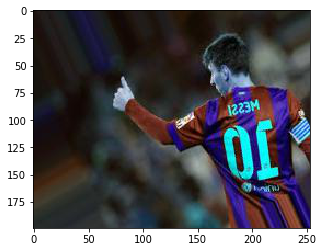

In [145]:
plt.imshow(plt.imread(test['Images'].iloc[55]))

['Kohli']


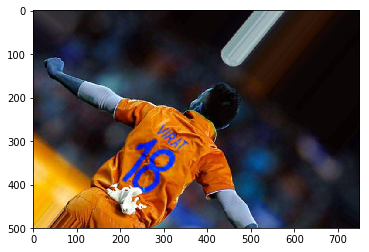

['Messi']


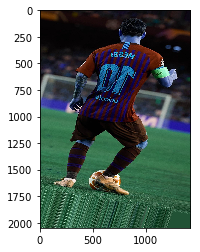

['Ronaldo']


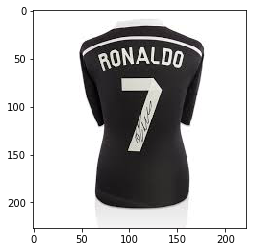

['Messi']


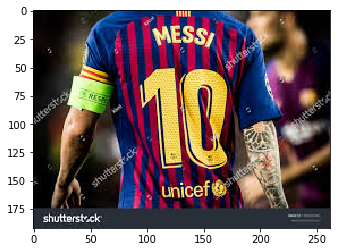

['Messi']


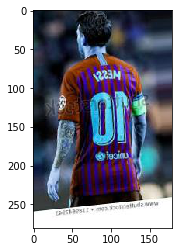

['Kohli']


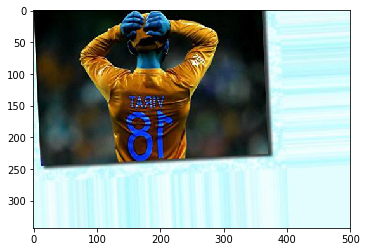

['Messi']


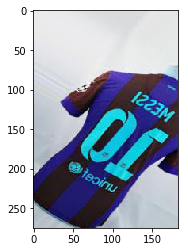

['Ronaldo']


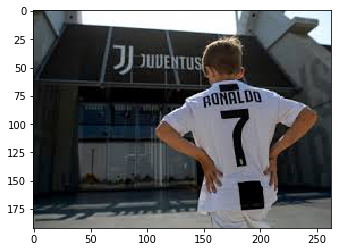

['Messi']


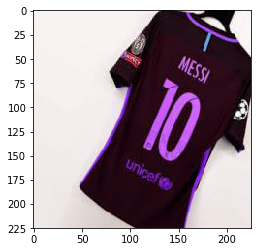

['Messi']


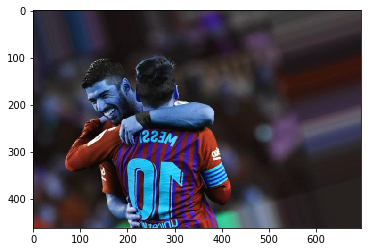

['Ronaldo']


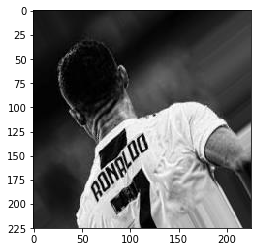

['Messi']


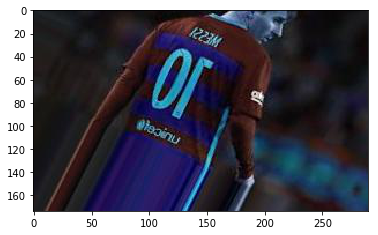

['Ronaldo']


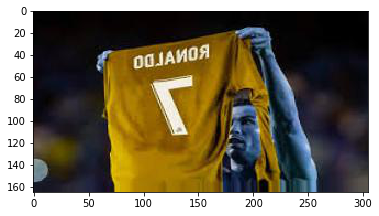

['Messi']


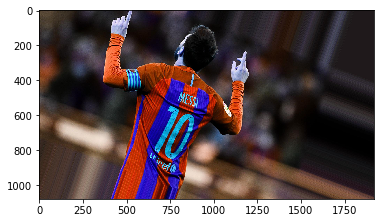

In [162]:
for i in [5,465,1025,1211,786,6,886,1155,324,366,345,744,845,100]:
    print(predict_player(test_x[i]))
    plt.imshow(plt.imread(test['Images'].iloc[i]))
    plt.show()